In [1]:
import sys
from os.path import expanduser, join
import copy
home = expanduser("~")
sys.path.append(join(home, 'Repositories/QuREBB'))

import numpy as np
import matplotlib.pyplot as plt
import lib.protocol as protocol
from protocols.tutorial_protocols import ProtocolA, ProtocolB, ProtocolC

In [2]:
save_path = "simulations_preprint/"

common_params = {
    'gamma_dephasing': 30.5e6,
    'splitting': 1e9,
    'DW': 0.7,
    'QE': 0.2,
    'link_loss': 0.99,
    'insertion_loss': 0.5,
    'dim': 3,
    'dc_rate': 0,
    'ideal': False
}

projector_params = {
    'f_operation': 0e9,
    'delta': 0e9,
    'kappa_r': 21.8e9/2,
    'kappa_t': 21.8e9/2, 
    'gamma': 92.5e6,
    'g': 8.38e9,
    'dc_rate': 0.000,
    'alpha': None,
}

emission_params = {
    'f_operation': 0e9,
    'delta': 0e9,
    'kappa_in': 240e9,
    'kappa_loss': 89e9, 
    'gamma': 100e6,
    'g': 6.81e9,
    'alpha': 0.1
}

sweep_params_projector ={
    
    'delta': np.linspace(0e9,120e9, int(60)),
    
    'f_operation': np.linspace(-18e9,0e9, int(1000)),
}

sweep_params_emission ={   
    'alpha' : np.linspace(0.0000001, 0.3, 500)
}

projector_params.update(common_params)
emission_params.update(common_params)

# Simulate Basic Protocols

## Protocol A

In [4]:
ps_A = protocol.ProtocolSweep(ProtocolA, emission_params, sweep_params_emission, save_results=True, save_folder=save_path, save_name='ProtocolA')

In [5]:
ps_A.run()

ps_A.generate_fidelity_rate_curve(type_axis = 'log')
ps_A.save_dataset_fidelity_rate()

Sweep time with multi was 75.051 s


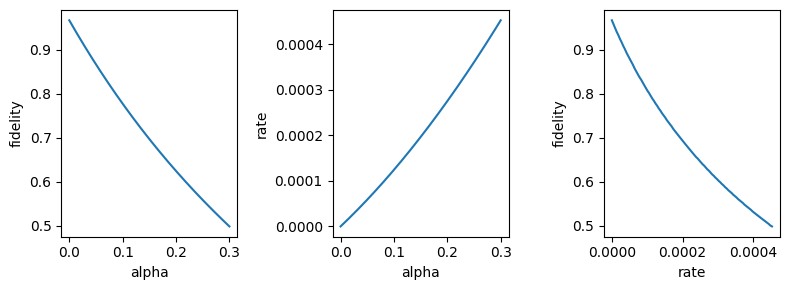

In [50]:
fig, ax = plt.subplots(1,3, figsize=(8,3))

ps_A.dataset.fidelity.plot(ax=ax[0])
ps_A.dataset.rate.plot(ax=ax[1])
ps_A.dataset_fidelity_rate.fidelity.plot(ax=ax[2])

fig.tight_layout()

## Protocol B

In [10]:
ps_B = protocol.ProtocolSweep(ProtocolB, projector_params, sweep_params_projector,save_results=True, save_folder=save_path, save_name='ProtocolB')

In [11]:
ps_B.run()

ps_B.generate_fidelity_rate_curve(type_axis = 'log')
ps_B.save_dataset_fidelity_rate()

Sweep time with multi was 7472.769 s


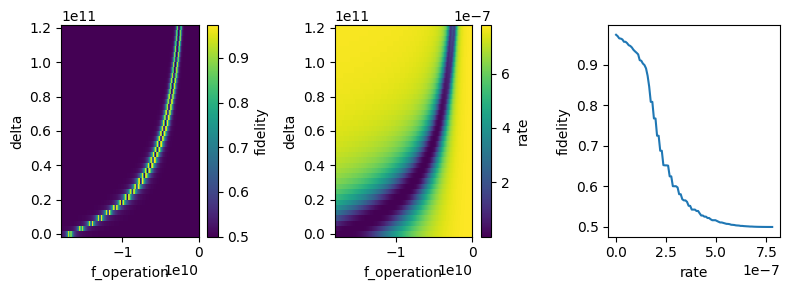

In [48]:
fig, ax = plt.subplots(1,3, figsize=(8,3))

ps_B.dataset.fidelity.plot(ax=ax[0])
ps_B.dataset.rate.plot(ax=ax[1])
ps_B.dataset_fidelity_rate.fidelity.plot(ax=ax[2])

fig.tight_layout()

## Protocol C

In [131]:
ps_C  = protocol.ProtocolSweep(ProtocolC, projector_params, sweep_params_projector, save_results=True, save_folder=save_path, save_name='ProtocolC')

In [ ]:
ps_C.run()

ps_C.generate_fidelity_rate_curve(type_axis = 'log')
ps_C.save_dataset_fidelity_rate()

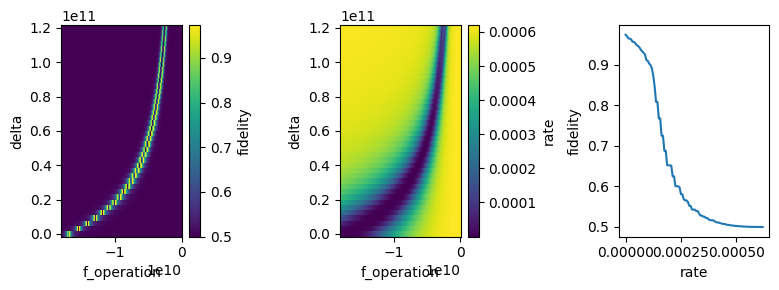

In [47]:
fig, ax = plt.subplots(1,3, figsize=(8,3))

ps_C.dataset.fidelity.plot(ax=ax[0])
ps_C.dataset.rate.plot(ax=ax[1])
ps_C.dataset_fidelity_rate.fidelity.plot(ax=ax[2])

fig.tight_layout()

## Protocol C with WCS

In [3]:
sweep_params_wcs ={
    'delta': np.linspace(0e9,120e9, int(50)),
    'f_operation': np.linspace(-15e9,-2e9, int(1200)),
    'alpha': np.linspace( 0.001 , 2. , int(10))
}

projector_params.update({"dim": 4})

In [4]:
ps_C_wcs  = protocol.ProtocolSweep(ProtocolC, projector_params, sweep_params_wcs,save_results=True, save_folder=save_path, save_name='ProtocolC_WCS')

In [5]:
ps_C_wcs.run()

ps_C_wcs.generate_fidelity_rate_curve(type_axis = 'log')
ps_C_wcs.save_dataset_fidelity_rate()

Sweep time with multi was 39061.230 s


NameError: name 'ps_C_wcs' is not defined

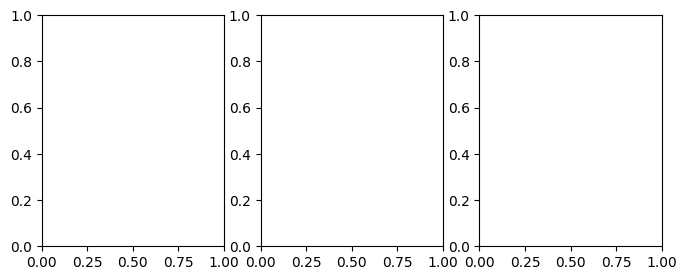

In [51]:
fig, ax = plt.subplots(1,3, figsize=(8,3))

ps_C_wcs.dataset.fidelity.plot(ax=ax[0])
ps_C_wcs.dataset.rate.plot(ax=ax[1])
ps_C_wcs.dataset_fidelity_rate.fidelity.plot(ax=ax[2])

fig.tight_layout()

# Plotting

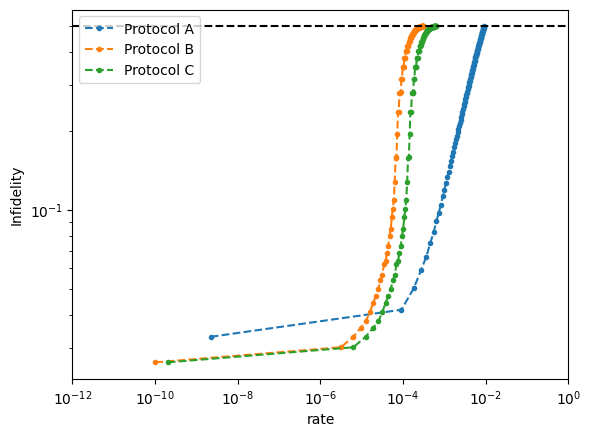

In [21]:
fig, ax = plt.subplots()

(1-ps_A.dataset_fidelity_rate.fidelity).plot(ax=ax, label='Protocol A', marker='.', linestyle='--')
(1-ps_B.dataset_fidelity_rate.fidelity).plot(ax=ax, label='Protocol B', marker='.', linestyle='--')
(1-ps_C.dataset_fidelity_rate.fidelity).plot(ax=ax, label='Protocol C', marker='.', linestyle='--')
(1-ps_C_wcs.dataset_fidelity_rate.fidelity).plot(ax=ax, label='Protocol C with WCS', marker='.', linestyle='--')


ax.hlines(0.5, 1e-12,1, color='k', linestyle='--')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-12, 1)
ax.set_ylabel('Infidelity')
plt.legend(loc=2)

# Cooperativity Sweep

In [45]:
common_params = {
    'gamma_dephasing': 30.5e6,
    'splitting': 1e9,
    'DW': 0.7,
    'QE': 0.2,
    'link_loss': 0.99,
    'insertion_loss': 0.5,
    'dim': 3,
    'dc_rate': 0,
    'ideal': False
}

projector_params = {
    'f_operation': 0e9,
    'delta': 0e9,
    'kappa_r': 21.8e9/2,
    'kappa_t': 21.8e9/2, 
    'gamma': 92.5e6,
    'g': 8.38e9,
    'dc_rate': 0.000,
}

projector_params.update(common_params)

In [46]:
sweep_params_projector ={
    
    'delta': np.linspace(0e10,12e10, int(60)),
    
    'f_operation': np.linspace(-18e9,0e9, int(1000)),
}


parameter_sweep_dict = {
    "1":
    {"delta": np.linspace(-0.8e10, 0.3e10, 60), 
     "f_operation": np.linspace(-1e9, 4e9, 1201)},
    
    "10":
    {"delta":np.linspace(-5e10, 1e10, 60), 
     "f_operation":np.linspace(0e9, 7e9, 1201)},
 
    "50":
    {"delta":np.linspace(-7e10, 0.5e10, 60), 
     "f_operation":np.linspace(0e9, 15e9, 1201)},
    
    "100":
    {"delta":np.linspace(-10e10, 0.5e10, 60), 
     "f_operation":np.linspace(2e9, 20e9, 1201)},
    
    "200":
    {"delta":np.linspace(-15e10, 1.0e10, 60), 
     "f_operation":np.linspace(2e9, 25e9, 1201)},
    
    "500":
    {"delta":np.linspace(-22e10, .0e10, 60), 
     "f_operation":np.linspace(5e9, 30e9, 1201)},
    
    "1000":
    {"delta":np.linspace(-28e10, -2.0e10, 60), 
     "f_operation":np.linspace(10e9, 40e9, 1201)},
    
#     "2500":
#     {"delta":np.linspace(-5e10, 1.0e10, 50), 
#      "f_operation":np.linspace(5e9, 30e9, 1501)},
    
#     "5000":
#     {"delta":np.linspace(-6e10, 1.0e10, 50), 
#      "f_operation":np.linspace(5e9, 35e9, 1501)},
}

## Sweeping Kappa

In [9]:
c_sweep = np.array([1, 10, 50, 100, 200, 500, 1000])

protocol_sweep_objects_kappa = {}

kappa_params = copy.deepcopy(projector_params)

for c in c_sweep:
    kappa_tot = 4*kappa_params['g']**2/(kappa_params['gamma']+kappa_params['gamma_dephasing'])/c
    kappa_params.update({'kappa_r': kappa_tot/2})
    kappa_params.update({'kappa_t': kappa_tot/2})

    sweep_params = sweep_params_projector

    ps_coop  = protocol.ProtocolSweep(ProtocolC, kappa_params, sweep_params, save_results=True, save_folder=save_path, save_name=f"CoopSweepKappa_C{int(c)}")

    ps_coop.run()
    ps_coop.generate_fidelity_rate_curve(type_axis = 'log')
    ps_coop.save_dataset_fidelity_rate()

    protocol_sweep_objects_kappa.update({str(c): ps_coop})


Sweep time with multi was 3452.888 s
Sweep time with multi was 3420.306 s
Sweep time with multi was 3405.598 s
Sweep time with multi was 3425.252 s
Sweep time with multi was 3391.698 s
Sweep time with multi was 3386.130 s
Sweep time with multi was 3382.164 s


## Sweeping g

In [47]:
protocol_sweep_objects_g = {}

g_params = copy.deepcopy(projector_params)

for c in c_sweep:
    g = np.sqrt( c * (g_params['kappa_r']+g_params['kappa_t']) * (g_params['gamma']+g_params['gamma_dephasing'])/4  )
    g_params.update({'g': g})
    sweep_params = parameter_sweep_dict[str(c)]

    ps_coop  = protocol.ProtocolSweep(ProtocolC, g_params, sweep_params, save_results=True, save_folder=save_path, save_name=f"CoopSweepG_C{int(c)}")

    ps_coop.run()
    ps_coop.generate_fidelity_rate_curve(type_axis = 'log')
    ps_coop.save_dataset_fidelity_rate()

    protocol_sweep_objects_g.update({str(c): ps_coop})   
    

Sweep time with multi was 4086.149 s
Sweep time with multi was 4074.094 s
Sweep time with multi was 4070.623 s
Sweep time with multi was 4078.237 s
Sweep time with multi was 4051.752 s
Sweep time with multi was 4115.438 s
Sweep time with multi was 4063.597 s
